# Evaluate each cell below in order by selecting them and Shift-Enter

## Part 1 - Load the recent trial data and make a heatmap

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
images_dir = os.environ.get('IMAGES_DIR', 'data/images')
results_dir = os.environ.get('RESULTS_DIR', 'results')
results_images_dir = os.environ.get('RESULTS_IMAGES_DIR', 'results/images')

In [3]:
if 'TRIAL_NAME' in os.environ:
    trial_name = os.environ['TRIAL_NAME']
else:
    results = ! ../../src/latest_trial.py    
    trial_name = results[0]
stats_filename = os.path.join(results_dir, "STATS_%s.csv" % trial_name)
print("Latest trial:", trial_name)
print("Stats file:", stats_filename)

Latest trial: trial005
Stats file: results/STATS_trial005.csv


In [4]:
df = pd.read_csv(stats_filename)

In [5]:
def convert_time(s):
    # can do other processing here if not only in seconds 
    if s[-1] == 's':
        return float(s[:-1])
    else:
        raise Exception("value is not in seconds")
        
def convert_time_array(a):
    return [convert_time(s) for s in a]

In [6]:
dftime = df.copy()
dftime['time'] = convert_time_array(df['time'])
dftime

,writeBatchLimit,leafBatchLimit,time
0,20,10,3.020
1,200,10,2.883
2,20,100,3.404
3,2000,10,2.727
4,200,100,2.602
5,20,1000,2.721
6,20000,10,2.962
7,2000,100,2.614
8,200,1000,2.537
9,20,10000,2.717


In [7]:
pivoted = dftime.pivot(index='writeBatchLimit', columns='leafBatchLimit', values='time')
pivoted

leafBatchLimit,10,100,1000,10000,100000
writeBatchLimit,,,,,
20,3.020,3.404,2.721,2.717,2.711
200,2.883,2.602,2.537,2.720,2.524
2000,2.727,2.614,2.606,2.498,2.678
20000,2.962,2.816,2.750,2.719,2.854
200000,3.690,3.534,3.588,3.731,3.990


data/images/heatmap_trial005.png


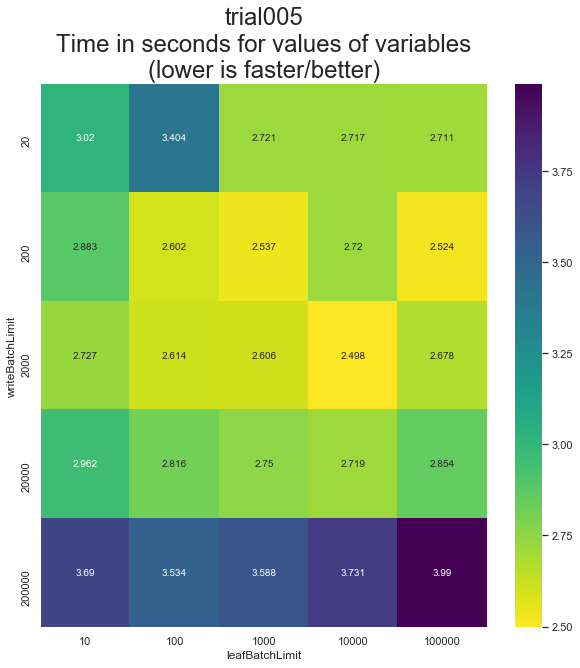

In [8]:
plt.subplots(figsize=(10,10))
plt.title(trial_name+"\nTime in seconds for values of variables\n(lower is faster/better)", fontsize=24)
heatmap = sns.heatmap(pivoted, annot=True, fmt="g", cmap='viridis_r')
heatmap_file = os.path.join(images_dir, "heatmap_%s.png" % trial_name)
print(heatmap_file)
fig = heatmap.get_figure()
fig.savefig(heatmap_file)
heatmap;

## Part 2 - Add the heatmap image to the heatmap animation
You've just created a new heatmap image
Continue to execute the cells below to add the image to an animation and view it. 

In [9]:
anim_file = "heatmap_AllTrials.gif"

In [10]:
! ../../src/update_heatmap_anim.py -data_images_dir {images_dir} -results_images_dir {results_images_dir} -out {anim_file}

new animated heatmap results/images/heatmap_AllTrials.gif


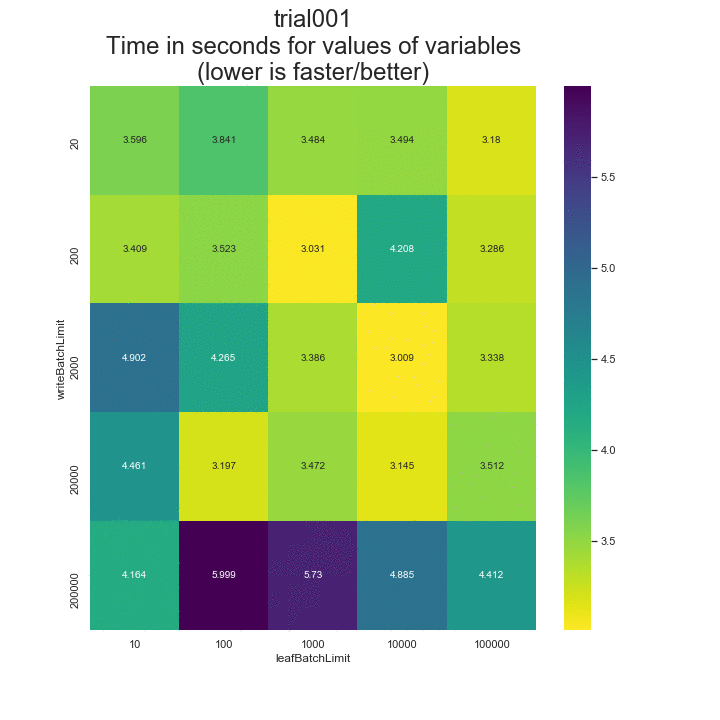

In [11]:
from IPython.display import Image
Image(filename="{}/{}".format(results_images_dir, anim_file), width=720, height=376)

## Part 3 - Average the data from all trials and make a new heatmap

In [12]:
def get_pivoted(stats_fname):
    df = pd.read_csv(stats_fname)
    df['time'] = convert_time_array(df['time'])
    return df.pivot(index='writeBatchLimit', columns='leafBatchLimit', values='time')

In [13]:
import glob
avg_df = pd.DataFrame(index=pivoted.index, columns=pivoted.columns).fillna(0)
stats_trials = glob.glob(results_dir+"/STATS_trial*.csv")
for stats_file in stats_trials:
    print("Including", stats_file)
    avg_df = avg_df.add(get_pivoted(stats_file))    
avg_df /= len(stats_trials)
avg_df

Including results/STATS_trial004.csv
Including results/STATS_trial005.csv
Including results/STATS_trial002.csv
Including results/STATS_trial003.csv
Including results/STATS_trial001.csv


leafBatchLimit,10,100,1000,10000,100000
writeBatchLimit,,,,,
20,3.7958,3.5886,3.2290,3.0960,3.7328
200,3.7778,3.1786,3.2728,3.2162,3.0946
2000,3.4236,3.4136,3.1016,3.0026,3.1340
20000,3.5840,3.5756,3.8570,3.4760,3.4520
200000,4.2604,4.2750,4.4118,4.2176,4.2060


results/images/heatmap_Avg_AllTrials.png


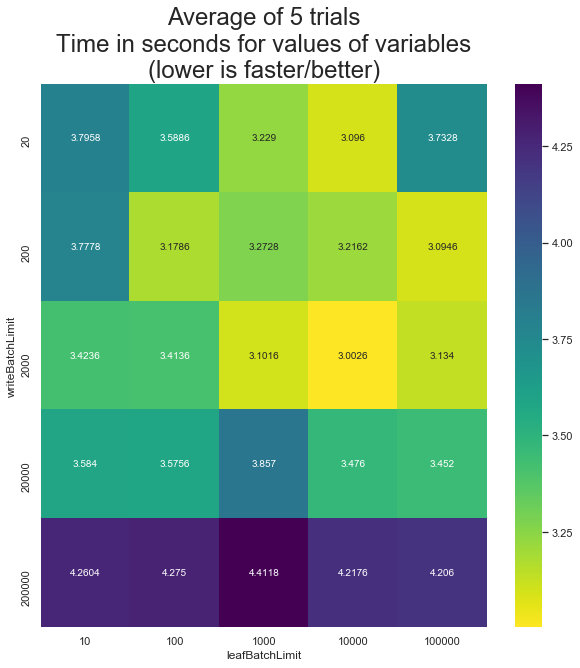

In [14]:
plt.subplots(figsize=(10,10))
first_line = "Average of {} trials".format(len(stats_trials))
plt.title(first_line+"\nTime in seconds for values of variables\n(lower is faster/better)", fontsize=24)
heatmap = sns.heatmap(avg_df, annot=True, fmt="g", cmap='viridis_r')
heatmap_file = os.path.join(results_images_dir, "heatmap_Avg_AllTrials.png")
print(heatmap_file)
fig = heatmap.get_figure()
fig.savefig(heatmap_file)
heatmap;